In [123]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#This is so that you don't see a bunch of code 'warnings' (things that you could change but don't have to right now)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

#This makes all of our graphs show up in our notebook when they're made
%matplotlib inline

In [124]:
data_raw = pd.read_csv('Covid_Searches_16-3.csv')
data_raw.head()

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
0,4/1/20,spain coronavirus,FALSE,Arizona,United States,1
1,4/1/20,how long does coronavirus live on surfaces,FALSE,California,United States,3
2,4/1/20,dati coronavirus,FALSE,Tuscany,Italy,4
3,4/1/20,italy coronavirus update,FALSE,England,United Kingdom,4
4,4/1/20,new mexico coronavirus update,FALSE,New Mexico,United States,1


In [125]:
#checking original shape of dataset 
data_raw.shape

(521791, 6)

In [126]:
#checking original data types of dataset 
data_raw.dtypes

Date                object
Query               object
IsImplicitIntent    object
State               object
Country             object
PopularityScore     object
dtype: object

We want to focus our analysis only on states within the United States. Therefore, we will subset the data to only include entries from the United States.

In [127]:
# subsetting dataset to only include queries from the United States
data = data_raw[data_raw.Country == "United States"]
data.head()

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
0,4/1/20,spain coronavirus,FALSE,Arizona,United States,1
1,4/1/20,how long does coronavirus live on surfaces,FALSE,California,United States,3
4,4/1/20,new mexico coronavirus update,FALSE,New Mexico,United States,1
7,4/1/20,pa coronavirus map,FALSE,New York,United States,1
9,4/1/20,corona virus tracker,FALSE,Arizona,United States,1


Below we are cleaning the data frame by changing the data types of the columns PopularityScore, Date, and IsImplicitIntent to respective data types integer, date, and boolean. We are also removing the Country column since that is no longer needed. Finally, we are checking for null values.

In [128]:
# changing Popularity Score data type to int
data.PopularityScore = data.PopularityScore.astype(int)
data.dtypes

Date                object
Query               object
IsImplicitIntent    object
State               object
Country             object
PopularityScore      int64
dtype: object

In [129]:
data.Date = pd.to_datetime(data['Date'])
data.head()

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
0,2020-04-01,spain coronavirus,FALSE,Arizona,United States,1
1,2020-04-01,how long does coronavirus live on surfaces,FALSE,California,United States,3
4,2020-04-01,new mexico coronavirus update,FALSE,New Mexico,United States,1
7,2020-04-01,pa coronavirus map,FALSE,New York,United States,1
9,2020-04-01,corona virus tracker,FALSE,Arizona,United States,1


In [130]:
data_1.IsImplicitIntent = data_1.IsImplicitIntent.astype(bool) #changed IsImplicitIntent to boolean data type (True/False)
data_1.shape

(282839, 5)

In [131]:
data_1 = data.drop("Country", axis=1) #removed Country column since all logs are from the States now!

In [132]:
# all null values were dropped when only looking at US Queries 
data_1.isna().sum()

Date                0
Query               0
IsImplicitIntent    0
State               0
PopularityScore     0
dtype: int64

In [133]:
data_1.head()

,Date,Query,IsImplicitIntent,State,PopularityScore
0,2020-04-01,spain coronavirus,FALSE,Arizona,1
1,2020-04-01,how long does coronavirus live on surfaces,FALSE,California,3
4,2020-04-01,new mexico coronavirus update,FALSE,New Mexico,1
7,2020-04-01,pa coronavirus map,FALSE,New York,1
9,2020-04-01,corona virus tracker,FALSE,Arizona,1


Our theory is that the number of searches related to potentially being infected with COVID-19,...

In [134]:
sig_words = ["symptoms","symptom","symtom", "symptome", "cough", "fever", "sick", "do I have", "how to tell", "how to know",
             "self-diagnos", "what to do", "cure", "vaccine", "vaccin", "flu", "hospital", "treatment", "signs"]

In [135]:
data_2 = data_1[data_1["Query"].str.contains('|'.join(sig_words))]

In [136]:
data_2.head()

,Date,Query,IsImplicitIntent,State,PopularityScore
53,2020-04-01,what are the symptoms of the coronavirus,FALSE,Arizona,1
109,2020-04-01,coronavirus treatment,FALSE,Colorado,1
222,2020-04-01,coronavirus treatment update,FALSE,California,1
244,2020-04-01,signs and symptoms of coronavirus,FALSE,New York,1
314,2020-04-01,coronavirus symptoms,FALSE,New Mexico,10


In [137]:
data_2.shape

(10615, 5)

In [138]:
chart = data_2.pivot_table(index="Date", 
               columns='State', 
               values='PopularityScore',
               aggfunc='sum').head()
chart

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District Of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,32.0,18.0,44.0,24.0,75.0,35.0,36.0,17.0,39.0,55.0,...,15.0,43.0,63.0,21.0,17.0,51.0,35.0,20.0,30.0,7.0
2020-04-02,36.0,15.0,50.0,18.0,78.0,50.0,60.0,11.0,30.0,63.0,...,14.0,52.0,85.0,13.0,NaN,53.0,39.0,28.0,41.0,8.0
2020-04-03,19.0,10.0,32.0,17.0,67.0,29.0,38.0,9.0,29.0,54.0,...,6.0,38.0,65.0,22.0,NaN,47.0,32.0,19.0,32.0,4.0
2020-04-04,23.0,7.0,29.0,18.0,48.0,22.0,23.0,3.0,23.0,43.0,...,4.0,27.0,51.0,11.0,7.0,32.0,23.0,17.0,22.0,NaN
2020-04-05,19.0,NaN,28.0,8.0,38.0,25.0,27.0,8.0,15.0,40.0,...,6.0,26.0,42.0,13.0,7.0,34.0,23.0,14.0,18.0,4.0


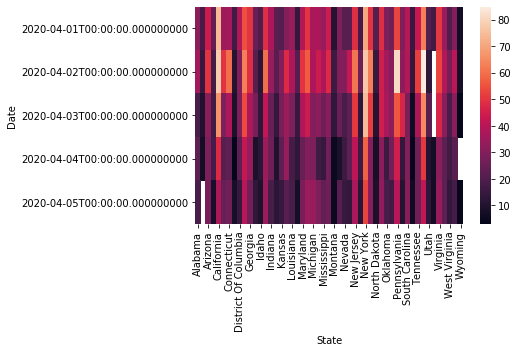

In [139]:
# why is this not showing all 50 states, is there a way to break this
# chart up into multiple? 
sns.heatmap(chart)

In [140]:
a = data_2.State.unique()
len(a)

51

In [141]:
chart_2 = data_2.groupby(["State"]).aggregate({'PopularityScore': sum }).sort_values(by = "PopularityScore",ascending = False)
chart_2

,PopularityScore
State,
New York,1505
California,1503
Texas,1443
Pennsylvania,1268
Florida,1170
New Jersey,1141
Virginia,1131
Illinois,1123
Massachusetts,1076


In [142]:
chart_3 = data_2.groupby(["Date"]).aggregate({'PopularityScore': sum }).sort_values(by = "PopularityScore",ascending = False)
chart_3

,PopularityScore
Date,
2020-04-26,4826
2020-04-02,1980
2020-04-01,1742
2020-04-27,1652
2020-04-06,1623
2020-04-03,1564
2020-04-07,1366
2020-04-08,1264
2020-04-04,1161


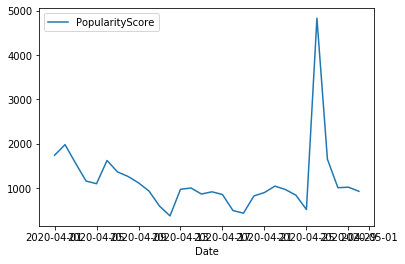

In [143]:
graph_3 = sns.lineplot(data = chart_3)
graph_3

In [144]:
graph_3.set_xticklabels(rotation=45)

TypeError: set_xticklabels() missing 1 required positional argument: 'labels'